In [1]:
# Import functions and libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from function.backtest import *

[*********************100%***********************]  1 of 1 completed


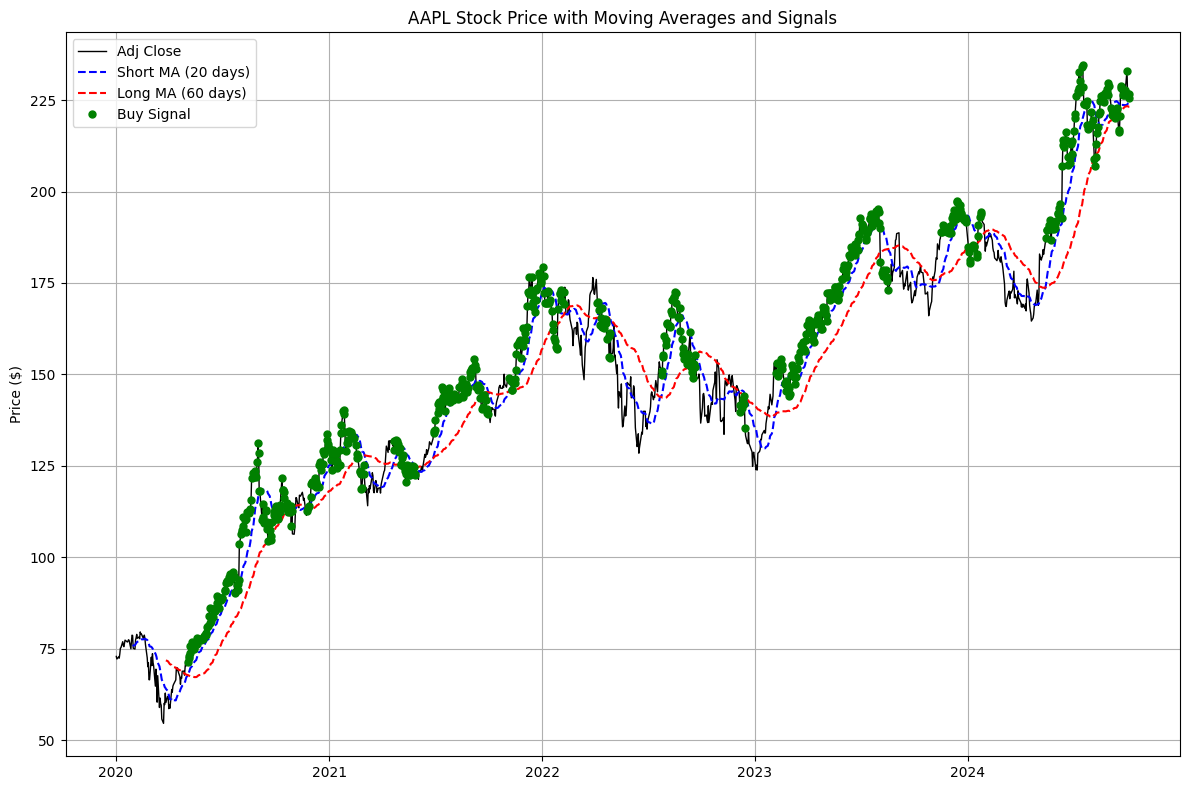

In [2]:
# Simple example on real-world data

# Fetch historical stock price data
ticker = 'AAPL'
start_date = '2020-01-01'
end_date = '2024-10-07'

data = yf.download(ticker, start=start_date, end=end_date)

# Calculate daily returns
data['returns'] = data['Adj Close'].diff(1)

# Generate trading signals based on moving averages
# When Short MA is greater than Long MA, we long the stock, otherwise, don't do anything 
short_window = 20
long_window = 60

data['Short_MA'] = data['Adj Close'].rolling(window=short_window).mean()
data['Long_MA'] = data['Adj Close'].rolling(window=long_window).mean()
data['signals'] = 0
starting_point = data.index[long_window]
data.loc[starting_point:, 'signals'] = np.where(data.loc[starting_point:, 'Short_MA'] > data.loc[starting_point:, 'Long_MA'], 1, 0)

# Drop NaN values from the DataFrame
# data.dropna(inplace=True)

# Plot the Signals
fig, ax1 = plt.subplots(figsize=(12, 8))

# Plot adjusted closing price and moving averages
ax1.plot(data['Adj Close'], label='Adj Close', color='black', linewidth=1)
ax1.plot(data['Short_MA'], label=f'Short MA ({short_window} days)', color='blue', linestyle='--')
ax1.plot(data['Long_MA'], label=f'Long MA ({long_window} days)', color='red', linestyle='--')

# Highlight buy/sell signals
buy_signals = data[data['signals'] == 1]

ax1.plot(buy_signals.index, data['Adj Close'][buy_signals.index], '.', markersize=10, color='green', label='Buy Signal')

ax1.set_title(f'{ticker} Stock Price with Moving Averages and Signals')
ax1.set_ylabel('Price ($)')
ax1.grid(True)
ax1.legend()

plt.tight_layout()
plt.show()


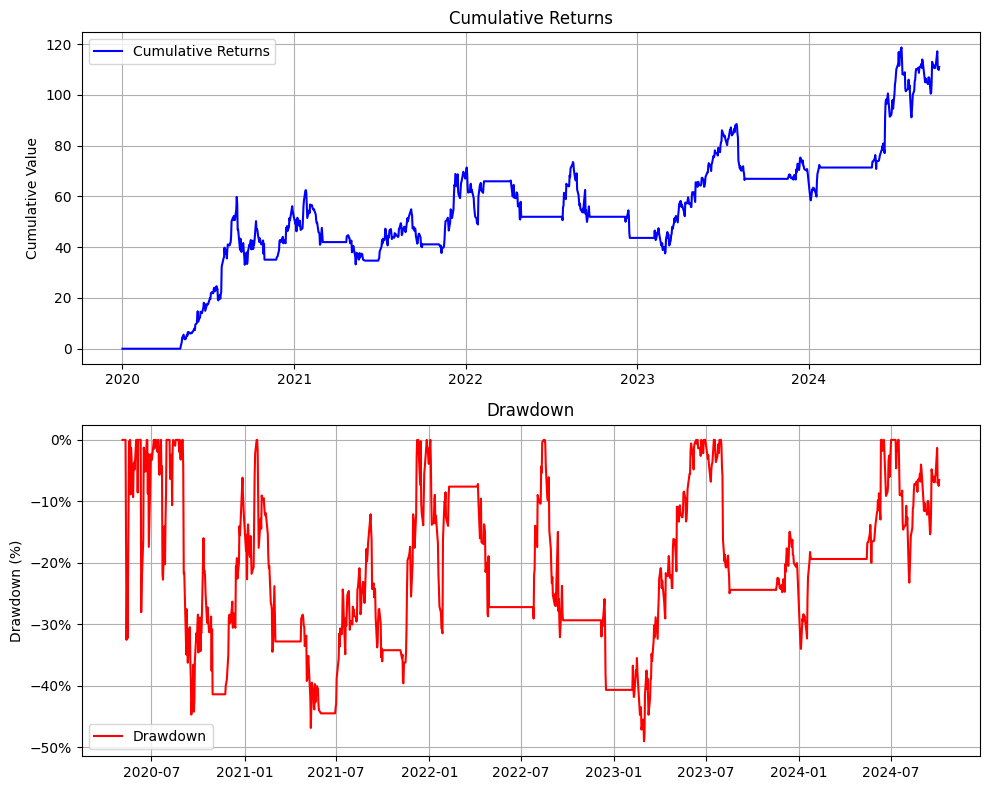

Total PnL: 110.98
Sharpe Ratio: 0.74
Max Drawdown: -48.99%
Cumulative Return: $110.98


In [3]:

# Backtest the strategy
df_result, results = backtest_strategy(signals=data['signals'], returns=data['returns'], plot_charts=True)

# Print the results
print(f"Total PnL: {results['Total PnL']:.2f}")
print(f"Sharpe Ratio: {results['Sharpe Ratio']:.2f}")
print(f"Max Drawdown: {results['Max Drawdown']:.2%}")
print(f"Cumulative Return: ${results['Cumulative Return']:,.2f}")